In [25]:
pip install seaborn

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [28]:
calories.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [29]:
exercise.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [30]:
df = exercise.merge(calories,on='User_ID')

In [31]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


In [37]:
gender_labels = df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

In [38]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,NaN,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,NaN,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,NaN,69,179.0,79.0,5.0,88.0,38.7,26.0


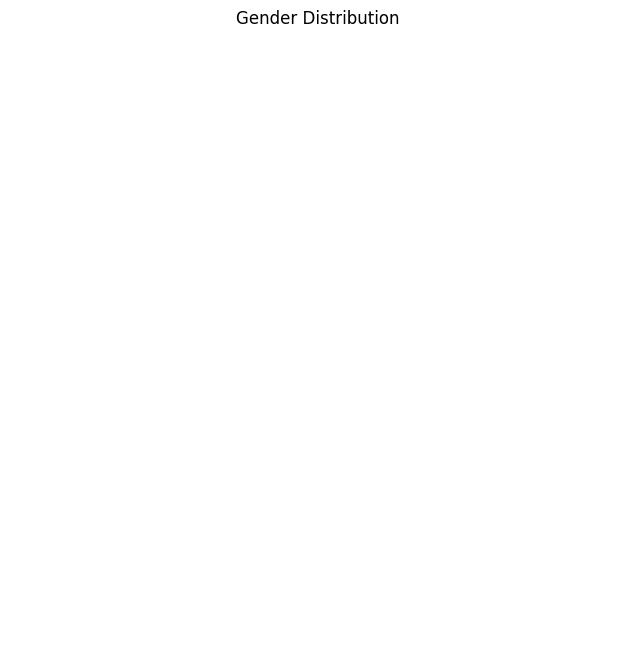

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(gender_labels.value_counts(), labels=gender_labels.value_counts().index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.show()


In [11]:
X = df.drop(['User_ID', 'Calories'], axis=1)
y = df['Calories']

In [12]:
X.shape

(15000, 7)

In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(10500, 7)

In [17]:
X_test.shape

(4500, 7)

In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
models = {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [20]:
for name, mod in models.items():
  mod.fit(X_train,y_train)
  y_pred = mod.predict(X_test)

  print(f"{name} MSE: {mean_squared_error(y_test,y_pred)}, Score:{r2_score(y_test,y_pred)}")

lr MSE: 132.919115800079, Score:0.9663275127619021
rd MSE: 132.91977377255685, Score:0.9663273460773005
ls MSE: 144.12749158465053, Score:0.963488087534808
dtr MSE: 29.882666666666665, Score:0.9924298043519406
rfr MSE: 8.848988577777776, Score:0.9977582798895273


In [21]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [22]:
import pickle

In [23]:
pickle.dump(rfr, open('rfr.pkl', 'wb'))
X_train.to_csv('X_train.csv')

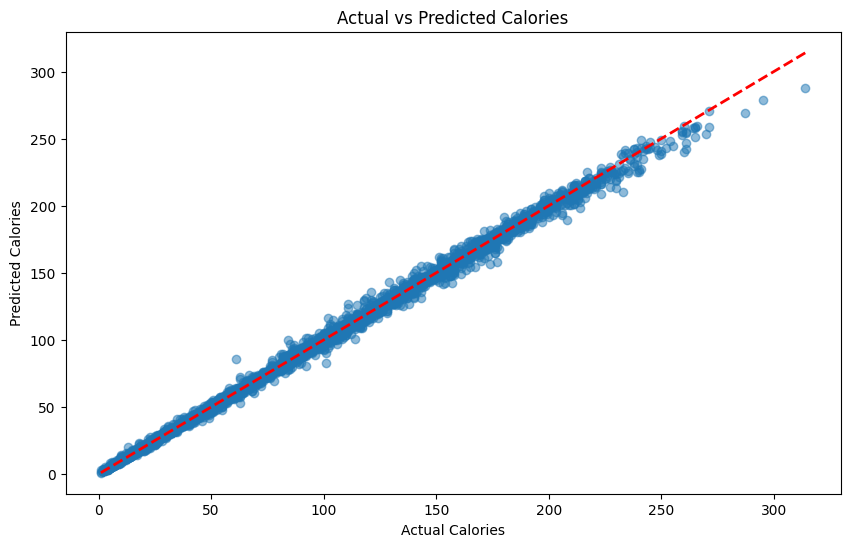

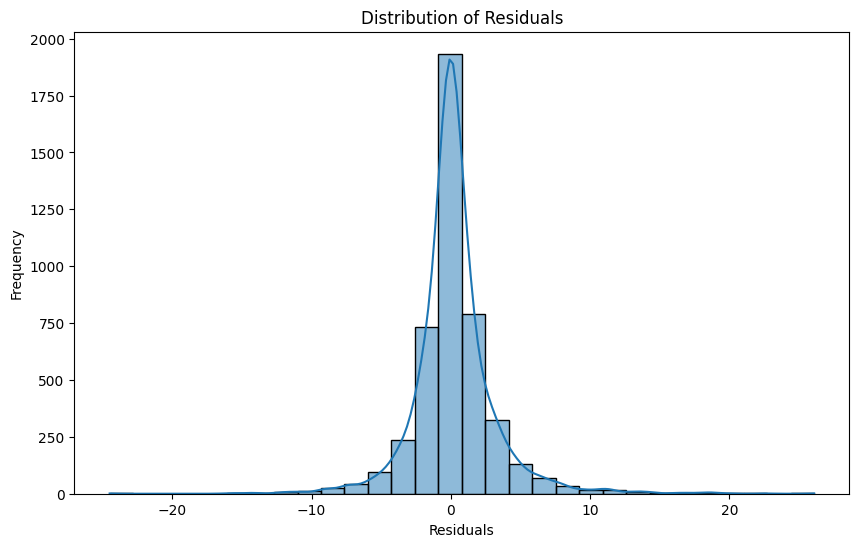

In [24]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()